# Neural Networks 

Humans have always been fascinated by nature and today we are in the era of building intelligent machines, and there is no better inspiration than the brain. Humans are particularly blessed by evolution with a brain capable of performing the most complex tasks.

Neural networks are one of the most powerful algorithms used in the field of machine learning and artificial intelligence nowadays. As the name suggests it draws inspiration from neurons in our brain and the way they are connected. Let us take a quick peek inside our brain.

![Brain](../../img/brain.jpeg)

Neurons are connected inside our brain as depicted in the picture above. This picture shows only 2 neurons connected to each other. In reality, thousands of neurons connect to each neuron. Let us simplify this picture to make an artificial neural network model.

![Cell](../../img/cell_body.jpeg)

![Multiperceptron](../../img/nn_1.jpeg)

### Perceptron

Perceptron is considered the smallest unit of neural networks, it acts as a linear classifier.Let’s look at a very small classification example. Let us try to build a machine which identifies whether an object is a cricket ball or not.

![Cricket](../../img/cricket.jpeg)

Let us arbitrarily choose some properties of this ball.

1. It is Red, we will call this property R of the ball
2. It is spherical, we will call this property S of the ball

![Table](../../img/properties.jpeg)

Depending on the arbitrarily chosen properties, also known as features, we will classify the object as a cricket ball or not. The above table tells us that if a ball is red and spherical, it is a cricket ball, in all other cases, it is not. Let’s see how to do this with a neural network.

To build our super tiny brain which can identify a cricket ball we will take a neuron which just adds up the inputs and outputs the sum.

![NN](../../img/nn_2.jpeg)

Breaking down the above figure; $b, R$ and $S$ are input neurons or simply the inputs to the network, $w0, w1$ and $w2$ are the strengths of connections to the middle neuron which sums up the inputs to it. $b$ here is a constant which is called bias. 

The last step which is the rightmost neuron is just a function called activation function which outputs 1 if the input to it is positive and 0 if the input it negative. Mathematically it looks like:

![form](../../img/formula_1.jpeg)

if this SUM > 0, Output = 1 or Yes and SUM < 0, Output = 0 or No

Let us look at how this helps in classifying our cricket ball. We choose some arbitrary numbers for our connection strengths $w$ and our constant $b$. This is done with a mathematical technique called gradient descent and it is the act of getting this that is called training a neural network. 

For now let’s just assume we got these numbers from somewhere

![form2](../../img/formula_2.jpeg)

Let us fit these values

Case 1: When the object is neither a sphere (S=0) nor red (R=0)

![rugby](../../img/rugby.jpeg)

![form3](../../img/formula_3.jpeg)

he SUM<0 which means the output is 0 or No. Our perceptron says that this is not a cricket ball.

Case 2: When the object is a sphere (S=1) but not red (R=0)

![tennis](../../img/tennis.jpeg)

![form4](../../img/formula_4.jpeg)

The SUM<0 which means the output is 0 or No, not a cricket ball

Case:3 When the object is not a sphere (S=0) but red (R=1)

![strawberry](../../img/strawberry.jpeg)

![form5](../../img/formula_5.jpeg)

The SUM<0 which means the output is 0 or No, not a cricket ball

Case 4: When the object is a sphere (S=1) and red (R=1)

![cricket2](../../img/cricket_2.jpeg)

![form6](../../img/formula6.jpeg)

The SUM>0 which means the output is 1. Et Voila! Our perceptron says it is a cricket ball.

This is the most rudimentary idea behind a neural network even though oversimplified. We connect lot of these perceptrons in a particular manner and what we get is a neural network. 

In [2]:
import pandas as pd
import numpy as np

# Location of dataset
url = 'http://bit.ly/PGGM_dataset'

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

To see what this dataset actually looks like, execute the following command:

### Data Exploration
We always want to visualize and understand our data first!

In [18]:
print("Samples: {}, Features: {}".format(*irisdata.shape))
irisdata['cat_sales_growth'] = np.where(irisdata['5Y_Sales_Growth']>0, 1, -1)
irisdata.head()

Samples: 38026, Features: 19


,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,cat_sales_growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,1
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,-1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,-1
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,1
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,1


Wow! 38k samples. Good since we want over 10K samples! Also we have about 18 features so it seems like the curse of dimensionality may be an issue. Next, lets make a pairplot to see that there are a couple of features which will give a large indication of how to classify our samples.

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


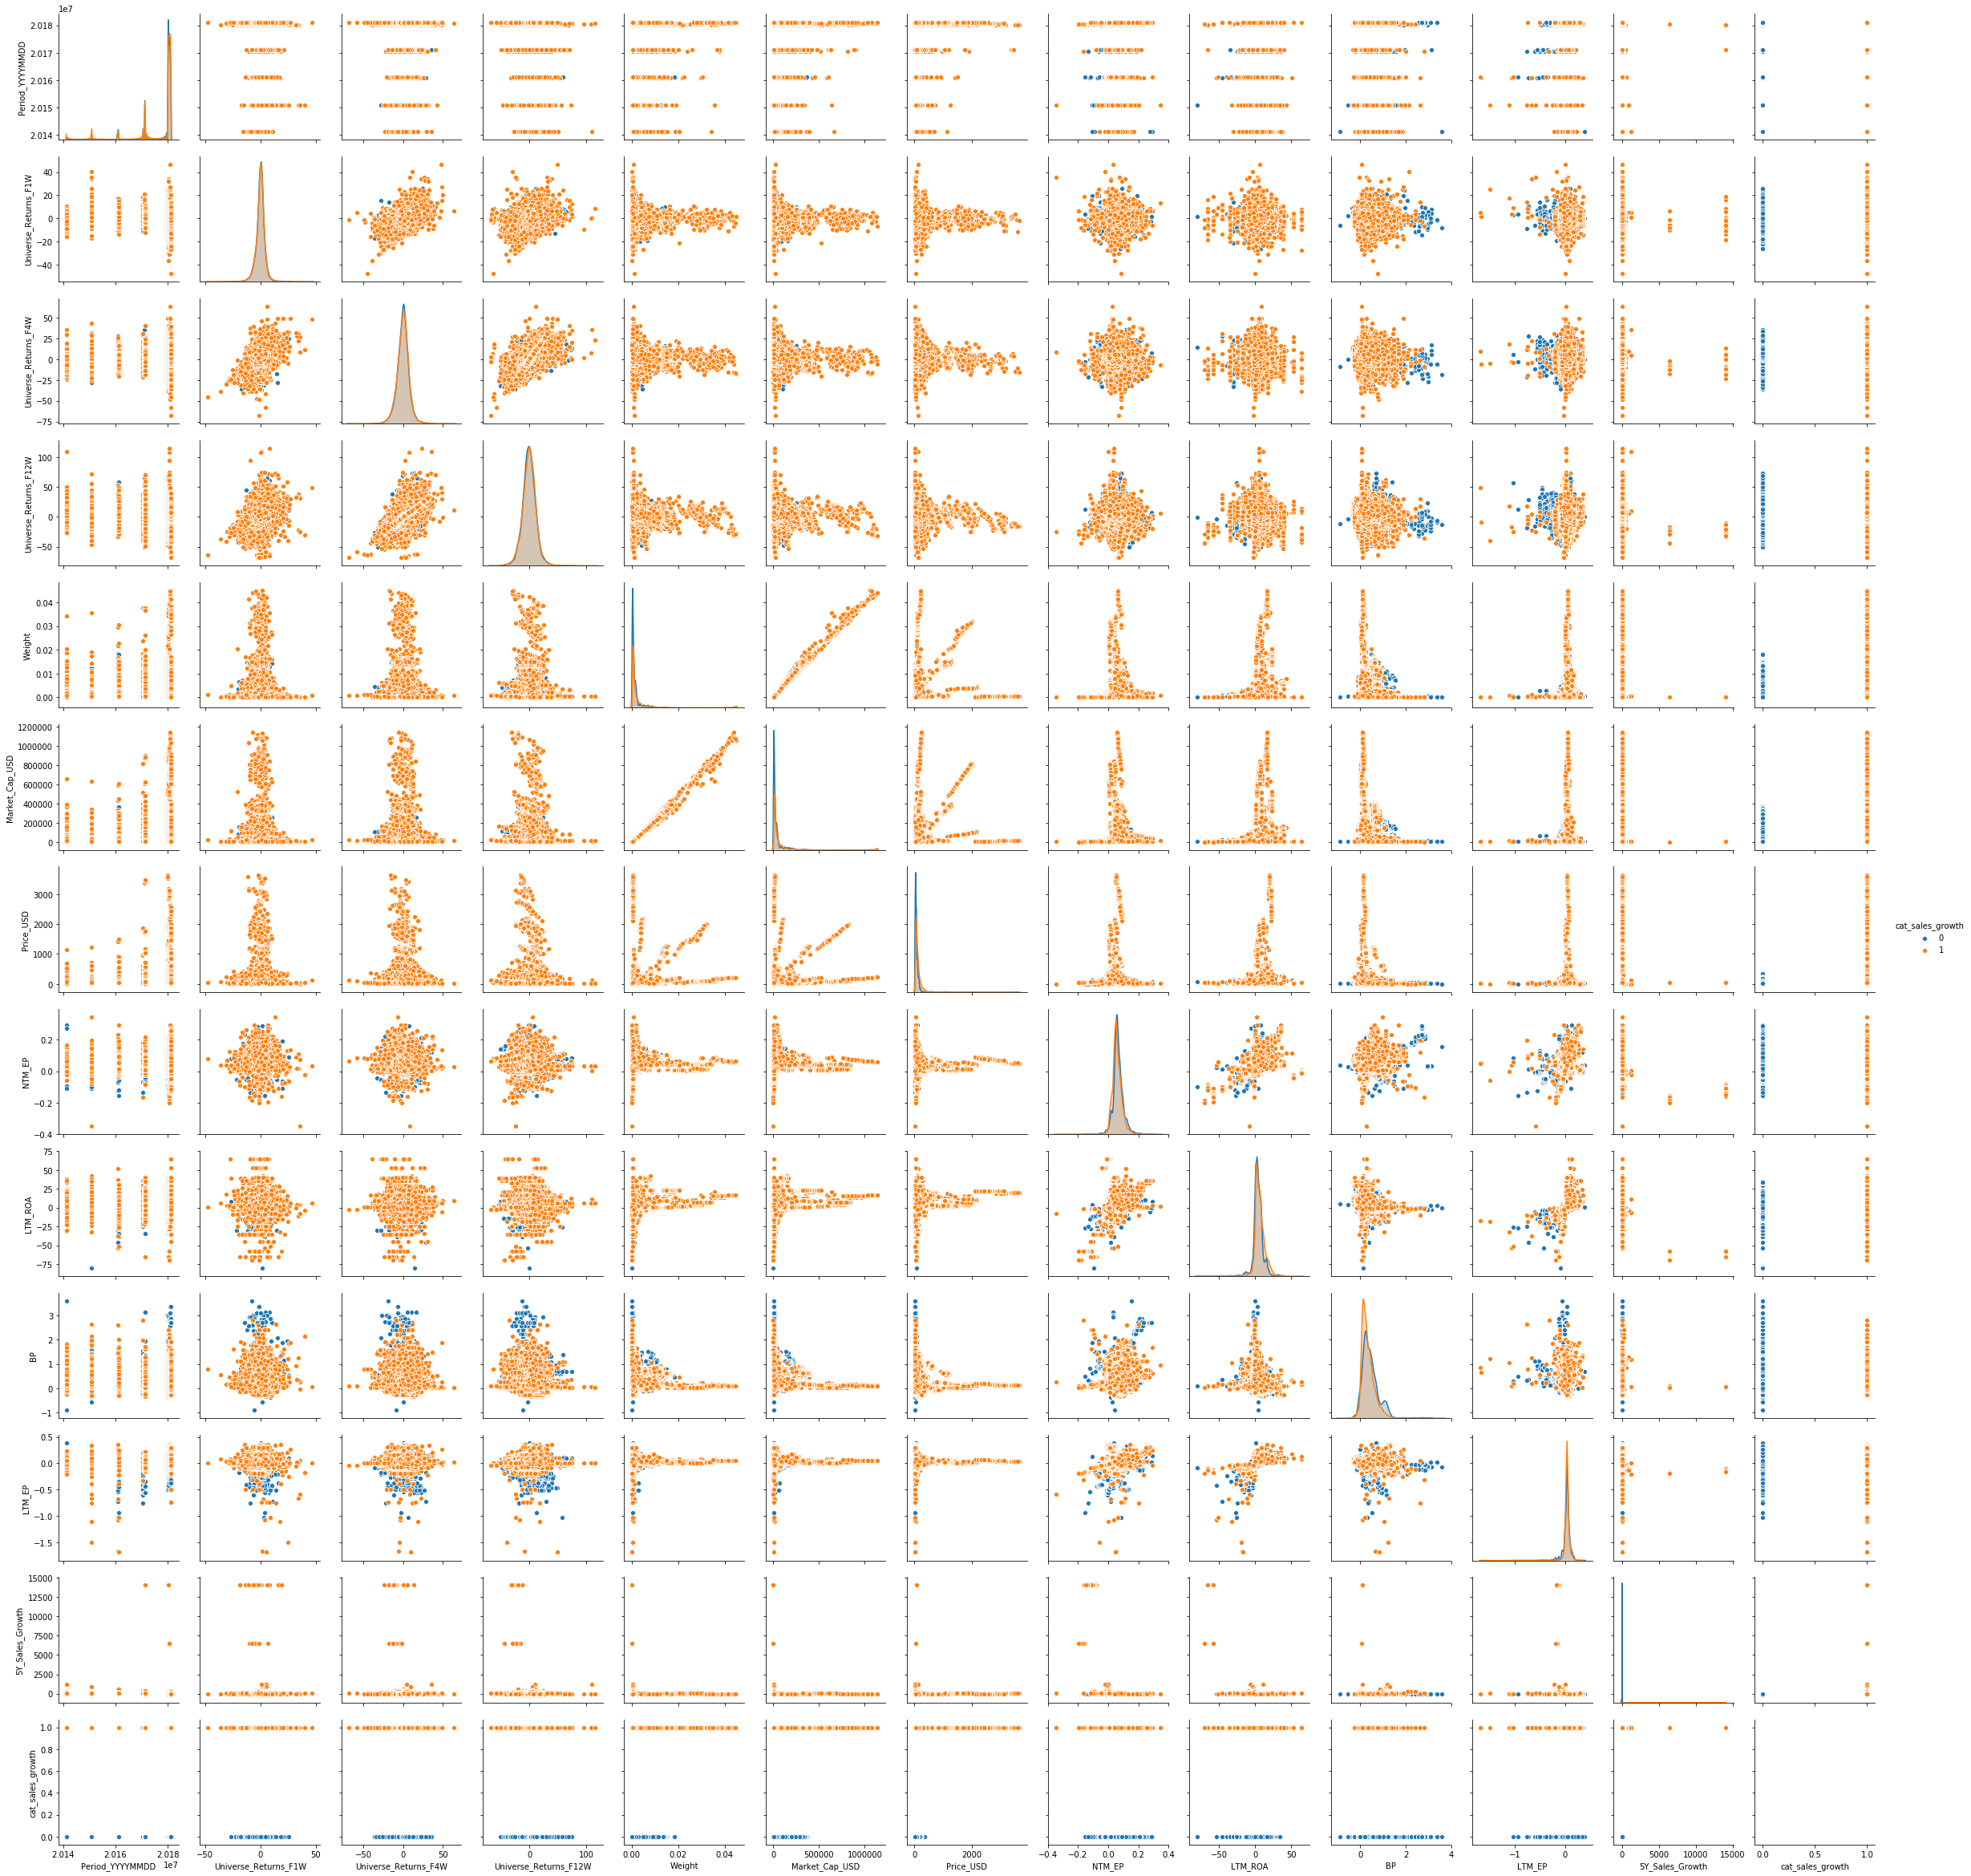

In [22]:
import seaborn as sns
g = sns.pairplot(irisdata, hue="cat_sales_growth")
g

### Preprocessing
You can see that our dataset has five columns. The task is to predict the class (which are the values in the fifth column) that the iris plant belongs to, which is based upon the sepal-length, sepal-width, petal-length and petal-width (the first four columns). The next step is to split our dataset into attributes and labels. Execute the following script to do so:

In [19]:
# Remove missing data
irisdata = irisdata.dropna()

# Assign data from fifth column to 8th variable Universe_Returns_F1W to Weight
X = irisdata.iloc[:, 5:9]

# Assign data from our new categorical columns to y variable
y = irisdata.iloc[:, 18] 

In [20]:
y.head()  

0    1
1   -1
2   -1
3    1
4    1
Name: cat_sales_growth, dtype: int32

first let's see how many unique values we have in our y series.

In [21]:
y.value_counts()

 1    29447
-1     8579
Name: cat_sales_growth, dtype: int64

### Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits. The training data will be used to train the neural network and the test data will be used to evaluate the performance of the neural network. This helps with the problem of over-fitting because we're evaluating our neural network on data that it has not seen (i.e. been trained on) before.

To create training and test splits, execute the following script:

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

The above script splits 80% of the dataset into our training set and the other 20% in to test data.

Feature Scaling
Before making actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Feature scaling is performed only on the training data and not on test data. This is because in real world, data is not scaled and the ultimate purpose of the neural network is to make predictions on real world data. Therefore, we try to keep our test data as real as possible.

The following script performs feature scaling:

In [8]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### Training and Predictions
And now it's finally time to do what you have been waiting for, train a neural network that can actually make predictions. To do this, execute the following script:

In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    hidden_layer_sizes=(50,3),
    activation='logistic',
    solver='sgd',
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.3,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=10,
    random_state=42,
    max_iter=100
)
# from plot_learning_curve import plot_learning_curve
clf.fit(X_train, y_train)  

Iteration 1, loss = 0.53773880
Validation score: 0.773997
Iteration 2, loss = 0.53775811
Validation score: 0.773997
Iteration 3, loss = 0.53789253
Validation score: 0.773997
Iteration 4, loss = 0.53744243
Validation score: 0.773997
Iteration 5, loss = 0.53757204
Validation score: 0.773997
Iteration 6, loss = 0.53782725
Validation score: 0.773997
Iteration 7, loss = 0.53815160
Validation score: 0.773997
Iteration 8, loss = 0.53642282
Validation score: 0.773997
Iteration 9, loss = 0.53676091
Validation score: 0.773997
Iteration 10, loss = 0.53654978
Validation score: 0.773997
Iteration 11, loss = 0.53643155
Validation score: 0.773997
Iteration 12, loss = 0.53674682
Validation score: 0.773997
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.060000
Iteration 13, loss = 0.53411285
Validation score: 0.773997
Iteration 14, loss = 0.53412695
Validation score: 0.773997
Iteration 15, loss = 0.53402467
Validation score: 0.773997
Iterati

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 3), learning_rate='adaptive',
       learning_rate_init=0.3, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.2, verbose=10, warm_start=False)

Yes, with Scikit-Learn, you can create neural network with these three lines of code, which all handles much of the leg work for you. Let's see what is happening in the above script. The first step is to import the MLPClassifier class from the sklearn.neural_network library. In the second line, this class is initialized with two parameters.

The first parameter, hidden_layer_sizes, is used to set the size of the hidden layers. In our script we will create three layers of 50 nodes each. There is no standard formula for choosing the number of layers and nodes for a neural network and it varies quite a bit depending on the problem at hand. The best way is to try different combinations and see what works best.

The second parameter to MLPClassifier specifies the number of iterations, or the epochs, that you want your neural network to execute. Remember, one epoch is a combination of one cycle of feed-forward and back propagation phase.

By default the 'relu' activation function is used with 'adam' cost optimizer. However, you can change these functions using the activation and solver parameters, respectively.

In the third line the fit function is used to train the algorithm on our training data i.e. X_train and y_train.

The final step is to make predictions on our test data. To do so, execute the following script:

In [10]:
predictions = clf.predict(X_test)  

### Evaluating the Algorithm
We created our algorithm and we made some predictions on the test dataset. Now is the time to evaluate how well our algorithm performs. To evaluate an algorithm, the most commonly used metrics are a confusion matrix, precision, recall, and f1 score. The confusion_matrix and classification_report methods of the sklearn.metrics library can help us find these scores. The following script generates evaluation report for our algorithm:

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print("Test set score: %.3f" % clf.score(X_test, y_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1701
           1       0.78      1.00      0.87      5905

   micro avg       0.78      0.78      0.78      7606
   macro avg       0.39      0.50      0.44      7606
weighted avg       0.60      0.78      0.68      7606

Test set score: 0.776


C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


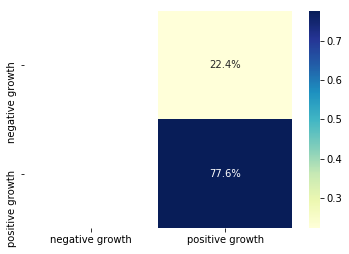

In [14]:
cm = confusion_matrix(y_test,predictions)
labels = ['negative growth', 'positive growth']
figure = sns.heatmap(cm / sum(cm), cmap="YlGnBu", annot=True, fmt=".1%", xticklabels=labels, yticklabels=labels)

A confusion matrix can be useful to seeing where our model is struggling. We want 100%s on the diagonal. In this case, it looks like our model does really well on classifying setosa and versicolor but often thinks that virginica is a versicolor! Looking back at the pairplot, we can see the predictors for these classes have similar distributions.

<img src='../../../img/download.png'>

<img src='../../../img/download1.png'>

<img src='../../../img/download2.png'>

### Exercise

In [ ]:
# Make an equivalent NN model for regression on the actual sales growth values using scikit-learn's MLPRegressor

In [23]:
y = irisdata.iloc[:, 17] 

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

In [25]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [26]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(
    hidden_layer_sizes=(50,3),
    activation='logistic',
    solver='sgd',
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.3,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=10,
    random_state=42,
    max_iter=100
)
# from plot_learning_curve import plot_learning_curve
clf.fit(X_train, y_train)  

Iteration 1, loss = 49680.93108411
Validation score: -0.618584
Iteration 2, loss = 49342.66667812
Validation score: -0.000217
Iteration 3, loss = 49369.37152173
Validation score: -0.066300
Iteration 4, loss = 49493.62967812
Validation score: -0.000433
Iteration 5, loss = 49453.57242762
Validation score: -0.002613
Iteration 6, loss = 49290.50138036
Validation score: -0.008259
Iteration 7, loss = 49455.59580209
Validation score: -0.000758
Iteration 8, loss = 49451.04490135
Validation score: -0.000412
Iteration 9, loss = 49433.91747827
Validation score: -0.001715
Iteration 10, loss = 49115.60971099
Validation score: -0.000471
Iteration 11, loss = 49488.52028578
Validation score: -0.000022
Iteration 12, loss = 49400.63141241
Validation score: -0.001218
Iteration 13, loss = 49269.37586553
Validation score: -3.388255
Iteration 14, loss = 49804.59134034
Validation score: -0.001351
Iteration 15, loss = 50800.27153939
Validation score: -0.000912
Iteration 16, loss = 51442.40253870
Validation sc

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 3), learning_rate='adaptive',
       learning_rate_init=0.3, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.2, verbose=10, warm_start=False)

In [27]:
predictions = clf.predict(X_test)  

In [31]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions))
print("Test set score: %.3f" % clf.score(X_test, y_test))

125761.14378376836
Test set score: -0.000
